# Single perceptron training for 2 linearly separable classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def generate_train_data(numvals):
    """
    Generate random data points with labels for two linearly separable classes and plot them.

    Args:
        numvals (int): Number of samples per class.

    Returns:
        tuple: 
            - trainIN (numpy.ndarray): A (2 * numvals) x 3 array, where each row contains 
              [Bias (-1), x, y] values.
            - trainLabels (numpy.ndarray): A (2 * numvals) array containing labels (0 and 1).
    """

    train_in = np.random.normal(0.0, 1.0, size=(numvals, 2))
    plot_coords = np.reshape(train_in,(2*numvals), 'F')

    plt.scatter(plot_coords[0:numvals], plot_coords[numvals:2*numvals])


    tmp = np.random.normal(5.0, 1.0, size=(numvals, 2))
    train_in = np.concatenate((train_in, tmp), axis=0)
    plot_coords = np.reshape(tmp, (2*numvals), 'F')

    plt.scatter(plot_coords[0:numvals], plot_coords[numvals:2*numvals])


    biasweight = np.full((2*numvals, 1), -1.0)
    train_in = np.concatenate((biasweight, train_in), axis=1)

    trainlabels = np.full(numvals, 0)
    tmp = np.full(numvals, 1)
    trainlabels = np.concatenate((trainlabels, tmp), axis=0)

    return train_in, trainlabels



def perceptron_out(weights, sample):
    """
    Compute the output of a perceptron using a step function as the activation.

    Args:
        weights (numpy.ndarray): Weight vector, including bias weight.
        sample (numpy.ndarray): Input matrix where each row is a data sample, 
                                including the bias term (-1 as the first column).

    Returns:
        numpy.ndarray: Output labels (0 or 1) for each input sample.
    """

    product = np.dot(weights, sample)

    return 1 if product > 0 else 0



def compute_mrse(samples, labels, weights):
    """
    Compute the Mean Root Square Error (MRSE) for perceptron evaluation.

    Args:
        samples (numpy.ndarray): Input data samples, including the bias term.
        labels (numpy.ndarray): True labels (0 or 1).
        weights (numpy.ndarray): Weight vector, including bias weight.

    Returns:
        float: The MRSE value.
    """

    mrse = 0.0

    for s in range(labels.size):
        y = perceptron_out(weights, samples[s])

        eps = labels[s] - y
        mrse = mrse + eps*eps

    mrse = np.sqrt(mrse/labels.size)

    return mrse



def plot_line(Xmin, Xmax, Ymin, Ymax, line):
    """
    Plots a line given by the implicit equation ax + by + c = 0.

    Args:
        Xmin (float): Minimum x-axis value.
        Xmax (float): Maximum x-axis value.
        Ymin (float): Minimum y-axis value.
        Ymax (float): Maximum y-axis value.
        line (numpy.ndarray): Coefficients [a, b, c] of the line equation ax + by + c = 0.

    Returns:
        None: Displays the plot.
    """

    delta = 0.025
    xrange = np.arange(Xmin, Xmax, delta)
    yrange = np.arange(Ymin, Ymax, delta)
    X, Y = np.meshgrid(xrange,yrange)

    print('Line equation: ', line[0], 'x + ', line[1], 'y + ', line[2], ' = 0')

    norm = np.sqrt(line[0]**2 + line[1]**2)
    line = line / norm

    F = np.fabs(line[0]*X + line[1]*Y + line[2])
    plt.contourf(X, Y, (F), levels=[0, 0.01])


def main(alpha = 0.1, weights = np.array([0, 0, 0])):
    maxiterations = 10

    train_in, trainlabels = generate_train_data(100)

    weights_changed = True
    i = 0

    while i < maxiterations and weights_changed is True:
        print("Iteration ", i)
        print("weights ", weights)

        old_weights = weights

        for sample, label in zip(train_in, trainlabels):
            output = perceptron_out(weights, sample)
            error = label - output
            weights = weights + alpha * error * sample
        
        if np.array_equal(old_weights, weights):
            weights_changed = False
            

        i += 1


    print('MRSE:', compute_mrse(train_in, trainlabels, weights))

    line = np.array([weights[1], weights[2], -weights[0]])  # minus since we have fixed -1 for the bias
    plot_line(-2, 6, -2, 6, line)
    plt.show()




Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.1         0.34081313  0.35529544]
Iteration  2
weights  [0.3        0.09765572 0.27279487]
Iteration  3
weights  [0.4        0.06452213 0.15467936]
MRSE: 0.0
Line equation:  0.06452213418864128 x +  0.15467936354992382 y +  -0.4  = 0


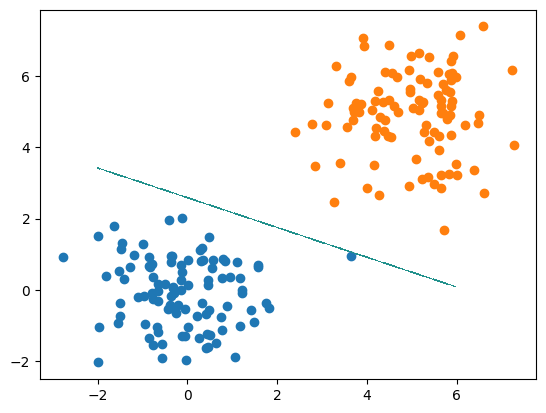

In [19]:
main()

Learning rate: 0.0
Iteration  0
weights  [0 0 0]
MRSE: 0.7071067811865476
Line equation:  0.0 x +  0.0 y +  -0.0  = 0


/var/folders/71/gl2n_19n51nbm2sqzk_y4x9r0000gn/T/ipykernel_15529/2111030478.py:113: RuntimeWarning: invalid value encountered in divide
  line = line / norm


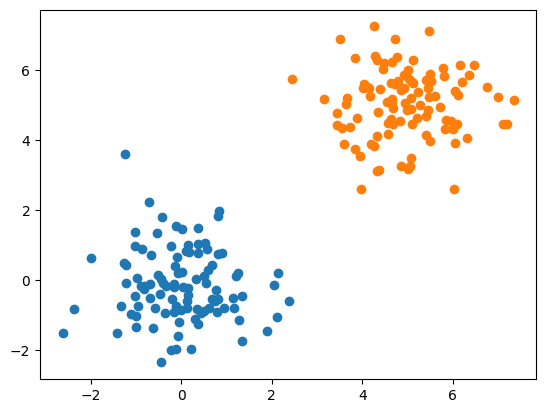

Learning rate: 0.1
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.1         0.4520434   0.45567463]
Iteration  2
weights  [0.5        0.2102454  0.01397671]
MRSE: 0.0
Line equation:  0.21024539860443636 x +  0.013976711959524518 y +  -0.5  = 0


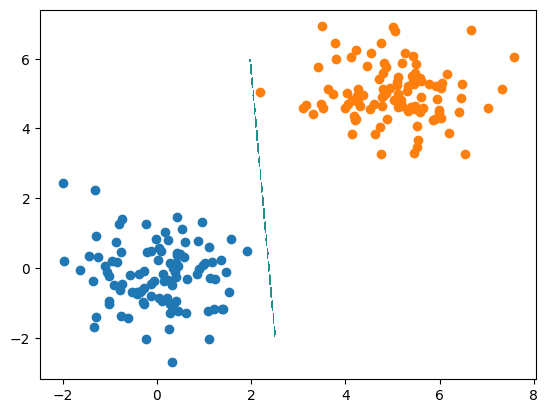

Learning rate: 0.2
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.2         0.93715568  0.80817709]
Iteration  2
weights  [1.2        1.08112661 0.79050221]
Iteration  3
weights  [1.6        0.67811124 0.33679131]
MRSE: 0.0
Line equation:  0.6781112359029131 x +  0.33679130916550143 y +  -1.5999999999999999  = 0


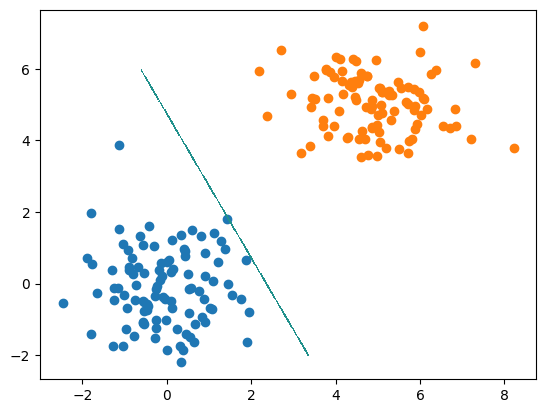

Learning rate: 0.30000000000000004
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.3         0.89427567  1.29164046]
Iteration  2
weights  [1.2        0.79261155 1.514059  ]
Iteration  3
weights  [1.8        0.2963464  0.56498295]
MRSE: 0.0
Line equation:  0.29634639695069764 x +  0.5649829464428102 y +  -1.8000000000000003  = 0


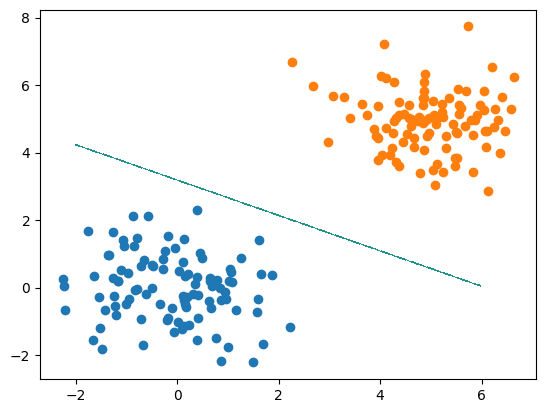

Learning rate: 0.4
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.4         2.44180832  2.09550927]
Iteration  2
weights  [2.         0.37736027 0.55358036]
MRSE: 0.0
Line equation:  0.3773602715431039 x +  0.5535803561595142 y +  -2.0  = 0


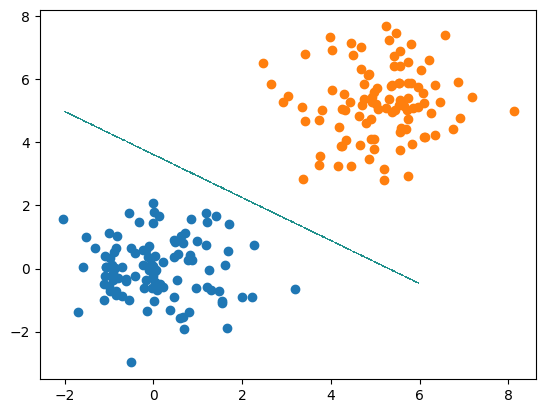

Learning rate: 0.5
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.5         2.72293446  2.86000444]
Iteration  2
weights  [2.5        0.44210017 1.12294873]
MRSE: 0.0
Line equation:  0.44210016959133347 x +  1.1229487349806697 y +  -2.5  = 0


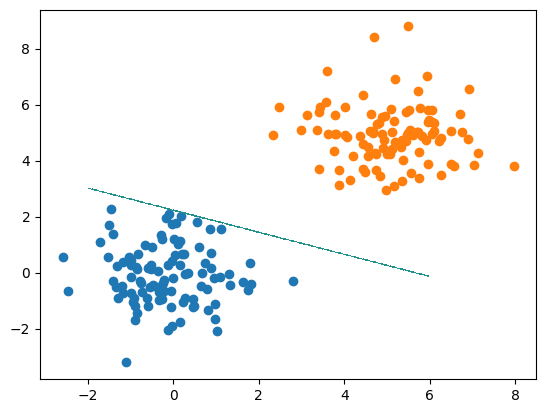

Learning rate: 0.6000000000000001
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.6         3.10613585  3.54709448]
Iteration  2
weights  [2.4        0.58552341 0.83942378]
MRSE: 0.0
Line equation:  0.5855234134066944 x +  0.8394237771143602 y +  -2.4000000000000004  = 0


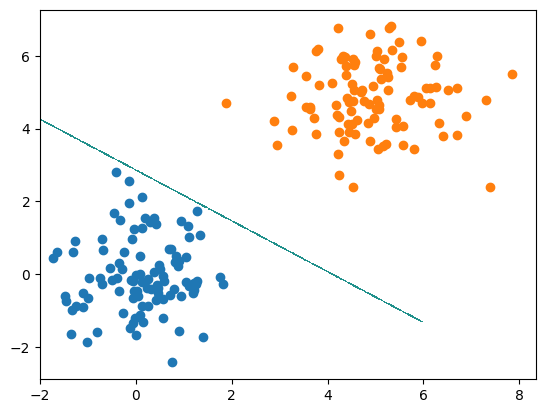

Learning rate: 0.7000000000000001
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.7         4.23974926  3.39932112]
Iteration  2
weights  [2.8        4.05335882 3.08206489]
Iteration  3
weights  [4.9        1.51240688 1.08720008]
MRSE: 0.0
Line equation:  1.5124068834561029 x +  1.0872000809583655 y +  -4.9  = 0


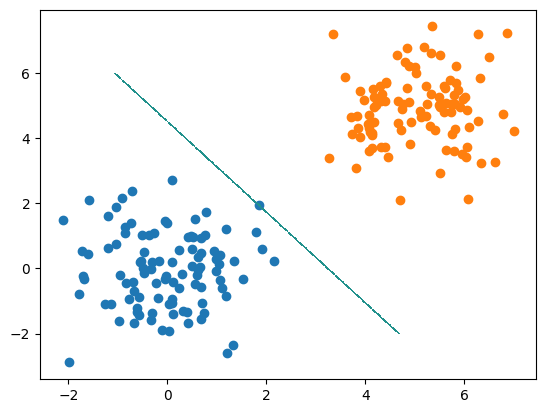

Learning rate: 0.8
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.8         4.38297076  3.56114264]
Iteration  2
weights  [2.4        4.6835375  3.88584774]
Iteration  3
weights  [4.8        2.5598094  3.85884757]
Iteration  4
weights  [6.4        1.48910137 0.98497023]
MRSE: 0.0
Line equation:  1.4891013699730218 x +  0.9849702278088415 y +  -6.3999999999999995  = 0


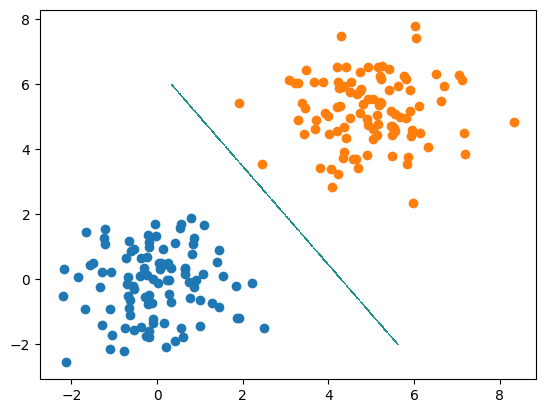

Learning rate: 0.9
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-0.9         5.62264897  4.6210968 ]
Iteration  2
weights  [5.4        1.05780483 1.81678072]
MRSE: 0.0
Line equation:  1.0578048291582207 x +  1.8167807220203307 y +  -5.4  = 0


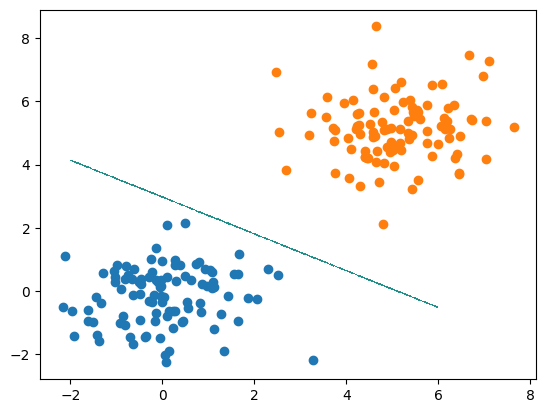

Learning rate: 1.0
Iteration  0
weights  [0 0 0]
Iteration  1
weights  [-1.          4.62047577  4.02523033]
Iteration  2
weights  [5.         3.78167495 5.76424108]
Iteration  3
weights  [8.         5.72012065 4.99278868]
Iteration  4
weights  [10.          4.05748487  1.70247134]
MRSE: 0.0
Line equation:  4.057484868134578 x +  1.7024713392265565 y +  -10.0  = 0


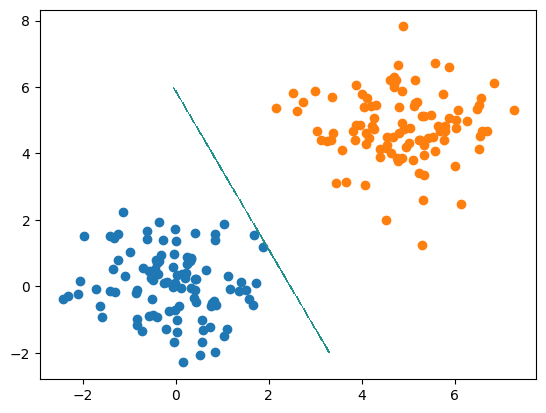

In [20]:
for lr in np.arange(0, 1.1, 0.1).tolist():
    print(f"Learning rate: {lr}")
    main(alpha = lr)


Initial weights: [0.57437704 0.06150778 0.4066651 ]
Iteration  0
weights  [0.57437704 0.06150778 0.4066651 ]
Iteration  1
weights  [0.57437704 0.38445706 0.68136317]
Iteration  2
weights  [ 0.87437704 -0.00746002  0.34947306]
MRSE: 0.0
Line equation:  -0.0074600242991196275 x +  0.3494730617849975 y +  -0.874377044610224  = 0


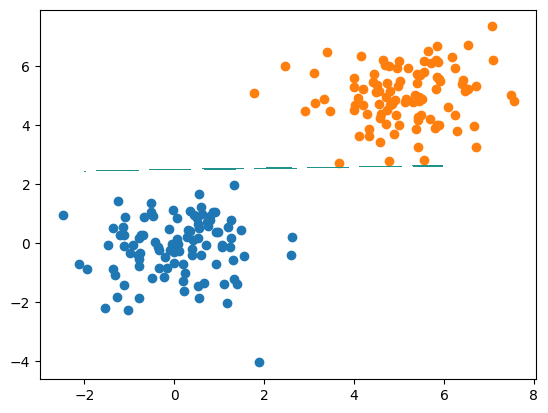

Initial weights: [0.33189069 0.71812858 0.61731051]
Iteration  0
weights  [0.33189069 0.71812858 0.61731051]
Iteration  1
weights  [0.73189069 0.44951852 0.63233806]
Iteration  2
weights  [0.93189069 0.57828903 0.53618038]
Iteration  3
weights  [1.13189069 0.2480555  0.28027753]
MRSE: 0.0
Line equation:  0.2480555000615465 x +  0.2802775323736316 y +  -1.1318906934888808  = 0


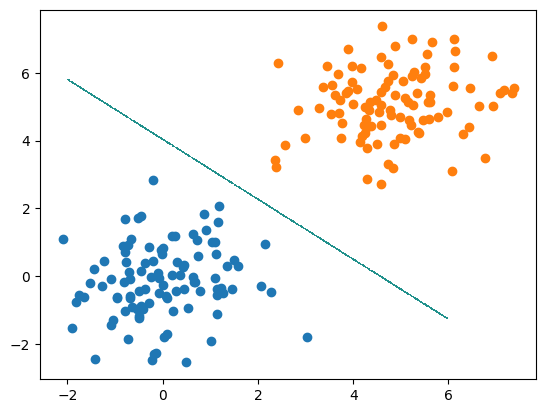

Initial weights: [0.34904435 0.63933983 0.45091138]
Iteration  0
weights  [0.34904435 0.63933983 0.45091138]
Iteration  1
weights  [0.74904435 0.06958116 0.25900963]
Iteration  2
weights  [0.74904435 0.48004454 0.53623441]
Iteration  3
weights  [0.94904435 0.20555773 0.25045816]
MRSE: 0.0
Line equation:  0.20555773254095588 x +  0.2504581604742342 y +  -0.9490443546977342  = 0


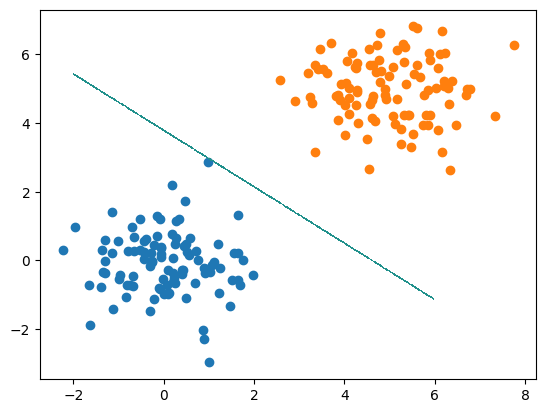

Initial weights: [0.7989039  0.1723439  0.02650052]
Iteration  0
weights  [0.7989039  0.1723439  0.02650052]
Iteration  1
weights  [0.6989039  0.57796311 0.33132729]
Iteration  2
weights  [0.8989039  0.24052568 0.12101236]
MRSE: 0.0
Line equation:  0.24052568113377112 x +  0.12101235570261817 y +  -0.8989038965202643  = 0


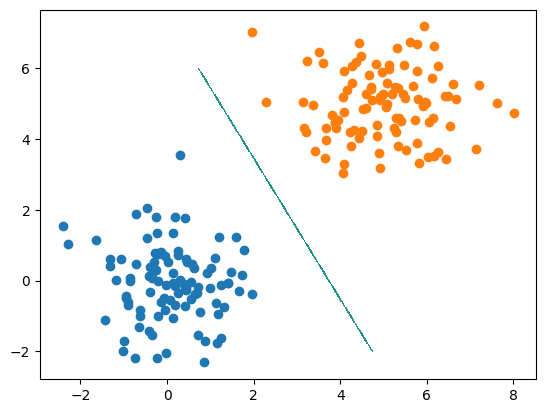

Initial weights: [0.39534632 0.52887498 0.88479238]
Iteration  0
weights  [0.39534632 0.52887498 0.88479238]
Iteration  1
weights  [0.79534632 0.44614825 0.46711068]
Iteration  2
weights  [0.89534632 0.31370666 0.33039878]
MRSE: 0.0
Line equation:  0.3137066566754359 x +  0.33039878210845586 y +  -0.8953463177244867  = 0


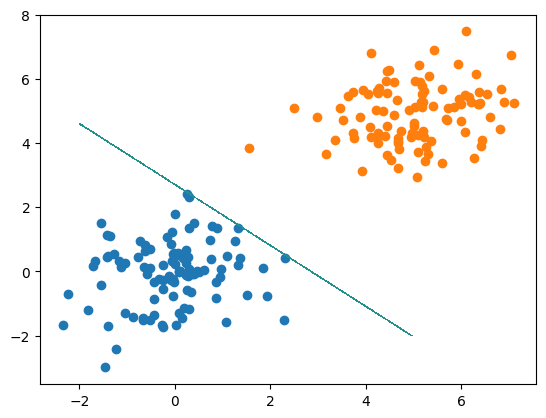

Initial weights: [0.13562506 0.77699185 0.14525332]
Iteration  0
weights  [0.13562506 0.77699185 0.14525332]
Iteration  1
weights  [0.53562506 0.45576998 0.6467199 ]
Iteration  2
weights  [0.83562506 0.30503407 0.50734481]
Iteration  3
weights  [0.93562506 0.1274358  0.44445807]
MRSE: 0.0
Line equation:  0.12743580472320906 x +  0.44445806866873083 y +  -0.9356250562668676  = 0


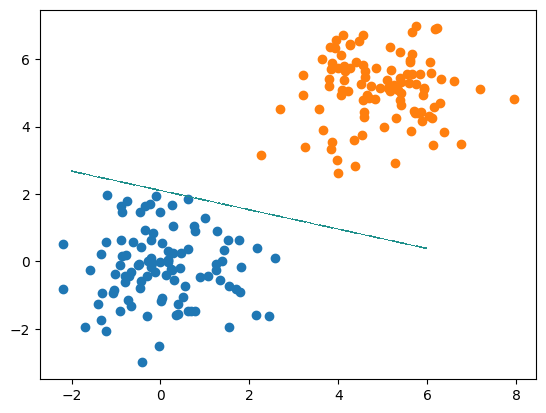

Initial weights: [0.27521188 0.19707629 0.16921234]
Iteration  0
weights  [0.27521188 0.19707629 0.16921234]
Iteration  1
weights  [0.27521188 0.58574135 0.49650733]
Iteration  2
weights  [0.57521188 0.3557039  0.38556366]
Iteration  3
weights  [0.67521188 0.24884613 0.18024209]
MRSE: 0.0
Line equation:  0.2488461318562465 x +  0.18024209421364246 y +  -0.6752118838322513  = 0


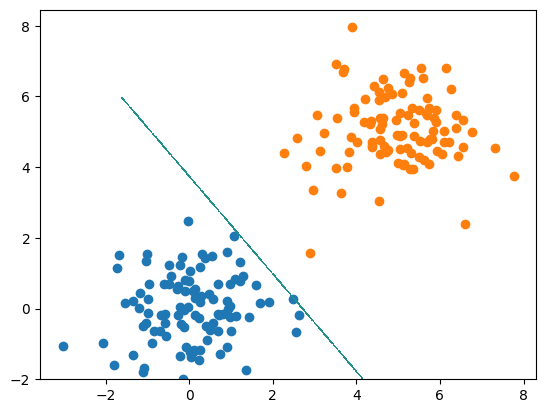

Initial weights: [0.79538111 0.84054751 0.25023417]
Iteration  0
weights  [0.79538111 0.84054751 0.25023417]
Iteration  1
weights  [1.09538111 0.69442134 0.39836143]
Iteration  2
weights  [1.29538111 0.36699739 0.16902796]
MRSE: 0.0
Line equation:  0.36699739078042165 x +  0.16902796220618 y +  -1.2953811067851655  = 0


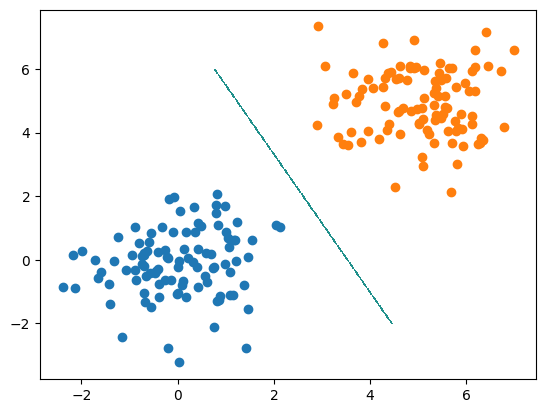

Initial weights: [0.91727953 0.38634219 0.23380302]
Iteration  0
weights  [0.91727953 0.38634219 0.23380302]
Iteration  1
weights  [1.01727953 0.19491874 0.14712302]
MRSE: 0.0
Line equation:  0.1949187377785731 x +  0.14712301589788523 y +  -1.0172795257268137  = 0


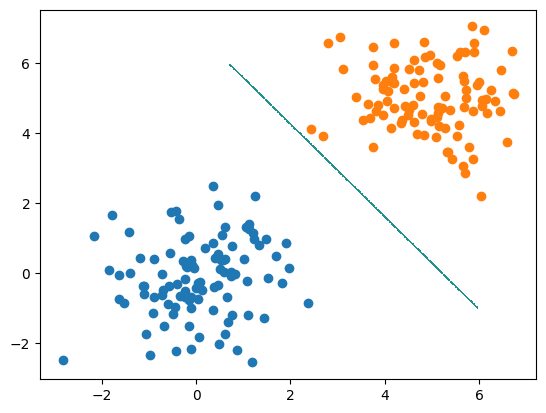

Initial weights: [0.70387177 0.67211759 0.89681694]
Iteration  0
weights  [0.70387177 0.67211759 0.89681694]
Iteration  1
weights  [1.10387177 0.48127954 0.68631127]
Iteration  2
weights  [1.30387177 0.18547587 0.4419469 ]
MRSE: 0.0
Line equation:  0.18547587420422512 x +  0.441946902929938 y +  -1.3038717716192894  = 0


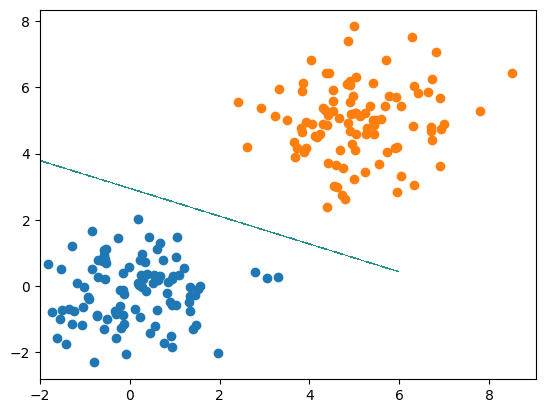

In [22]:
for i in range(10):
    init_weights = np.random.rand(3)

    print(f"Initial weights: {init_weights}")
    main(alpha = 0.1, weights = init_weights)